# Capstone Project 3

**Important:** The dataset could not be uploaded to GuitHub but can be downloaded [here](https://www.kaggle.com/ealtman2019/credit-card-transactions/download)

## Contents

1.  [File Analysis](#FileAnalysis).
2.  [File Edition](#FileEdition).
3.  [Exploratory Analysis 1: Proportion Analysis](#ProportionAnalysis).
4.  [Exploratory Analysis 2: Plot Analysis](#PlotAnalysis).
5.  [Preprocessing](#Preprocessing).
6.  [Modelling: Decision Tree](#ModellingDecisionTree).

## 1.  File Analysis<a id='FileAnalysis'></a>

In this first part of this notebook we will **analyze** the file and **clean** those rows or entries that could compromise further studies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
from datetime import datetime

In [2]:
# File read
file = pd.read_csv('credit.csv')
file.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


Let us have some general information about the file. As we can see, we have more than 24 million data points.

In [4]:
# General information about the file
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int64  
 1   Card            int64  
 2   Year            int64  
 3   Month           int64  
 4   Day             int64  
 5   Time            object 
 6   Amount          object 
 7   Use Chip        object 
 8   Merchant Name   int64  
 9   Merchant City   object 
 10  Merchant State  object 
 11  Zip             float64
 12  MCC             int64  
 13  Errors?         object 
 14  Is Fraud?       object 
dtypes: float64(1), int64(7), object(7)
memory usage: 2.7+ GB


Now let's see if there is any null values in any of our columns.

In [14]:
# Null values count
file.isnull().sum()

User                     0
Card                     0
Year                     0
Month                    0
Day                      0
Time                     0
Amount                   0
Use Chip                 0
Merchant Name            0
Merchant City            0
Merchant State     2720821
Zip                2878135
MCC                      0
Errors?           23998469
Is Fraud?                0
dtype: int64

As we can see the only columns in which we find null values are "Merchant State", "Zip", and "Errors". Yet it is possible that those null values have some significance or reasont to be actually null. It is important to analyze the nature of those null values.

In [14]:
file['Errors?'].unique()

array([nan, 'Technical Glitch', 'Insufficient Balance', 'Bad PIN',
       'Bad PIN,Insufficient Balance', 'Bad Expiration',
       'Bad PIN,Technical Glitch', 'Bad Card Number', 'Bad CVV',
       'Bad Zipcode', 'Insufficient Balance,Technical Glitch',
       'Bad Card Number,Insufficient Balance', 'Bad Card Number,Bad CVV',
       'Bad CVV,Insufficient Balance', 'Bad Card Number,Bad Expiration',
       'Bad Expiration,Bad CVV', 'Bad Expiration,Insufficient Balance',
       'Bad Expiration,Technical Glitch',
       'Bad Card Number,Bad Expiration,Technical Glitch',
       'Bad CVV,Technical Glitch', 'Bad Card Number,Technical Glitch',
       'Bad Zipcode,Insufficient Balance', 'Bad Zipcode,Technical Glitch',
       'Bad Card Number,Bad Expiration,Insufficient Balance'],
      dtype=object)

In the case of the "Errors column, we can see that the null value means that no error was produced in the credit card transaction. The null values in this case are completely valid and cannot be removed nor changed.

As we can see in the `info` above, the number of null values in the Zip column is different from the number of null values in the "Merchant State" column. It is convenient then, to take a look at those rows that do have a null value only in one of the mentioned columns.

In [51]:
file[np.logical_and(file['Zip'].isnull(), np.logical_not(file['Merchant State'].isnull()))].head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
407,0,0,2003,2,24,13:02,$7.52,Swipe Transaction,-727612092139916043,Zurich,Switzerland,NaN,5411,NaN,No
408,0,0,2003,2,25,06:46,$36.97,Swipe Transaction,-4816289482172287511,Zurich,Switzerland,NaN,5411,NaN,No
906,0,0,2004,7,22,06:32,$38.26,Swipe Transaction,3510944833163794547,Tallinn,Estonia,NaN,5912,NaN,No
907,0,0,2004,7,23,20:05,$75.38,Swipe Transaction,8793545055147237096,Tallinn,Estonia,NaN,5812,NaN,No
908,0,0,2004,7,25,13:08,$16.20,Swipe Transaction,2027553650310142703,Tallinn,Estonia,NaN,5541,NaN,No


There are some rows in which the "Zip" column appears to have a null value despite the fact that the "Merchant City" column is not null. Those are the rows in which the transaction took place on a different country.

In [52]:
# Choose rows with "Merchant State nulls" but "Zip non-nulls"
file[np.logical_and(file['Merchant State'].isnull(), np.logical_not(file['Zip'].isnull()))].head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?


There are no rows with an empty "Merchant State" entry and a non-null entry in the "Zip" column. That means that every non-null "Zip" value is always associated with a specific country. On the other hand, there are some rows that have null values in both the "Zip" and the "Merchant State" columns. It is impportant to analyze those:

In [54]:
# Choose those rows with "Zip nulls" and "Merchant State nulls"
file[np.logical_and(file['Zip'].isnull(), file['Merchant State'].isnull())].head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
11,0,0,2002,9,5,20:41,$53.91,Online Transaction,-9092677072201095172,ONLINE,NaN,NaN,4900,NaN,No
24,0,0,2002,9,9,20:02,$144.90,Online Transaction,-8338381919281017248,ONLINE,NaN,NaN,4899,NaN,No
85,0,0,2002,9,30,06:21,$127.32,Online Transaction,-7421093378627544099,ONLINE,NaN,NaN,5311,NaN,No
99,0,0,2002,10,6,06:14,$139.39,Online Transaction,-7421093378627544099,ONLINE,NaN,NaN,5311,NaN,No
106,0,0,2002,10,9,08:16,$53.09,Online Transaction,-4956618006720593695,ONLINE,NaN,NaN,5193,NaN,No


We can see that those rows with null values in both columns actually does not belong to a particular city either because it was an online transaction.

## 2.  File Edition<a id='FileEdition'></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In this second part, we will try to change the format of some columns so we can work with them in an easier way. This part is still "data wrangling".

Perhaps it would be best to "simplify" some of the columns in order for us to better analyze them. First, we must change the `dtype` of the "Amount" column to float values. In that way we an can analyze different quantities.

In [3]:
# For security create a copy of our "file" and store into "data"
data = file.copy()
data['Amount'] = data['Amount'].str.strip('$').astype('float64')
data.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


Now, we will convert the "Time" column to datetime. We will only use the hour in the time column.

In [4]:
# Change the time column to datetime
data['Time'] = pd.to_datetime(data['Time']).dt.hour
data.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,6,134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,6,38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,6,120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17,128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,6,104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


Finally we will, fill the Null values with a word that could be used with some meaning:

In [5]:
# Fill null values with word "none"
data.fillna('none', inplace = True)
data.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,6,134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,none,No
1,0,0,2002,9,1,6,38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,none,No
2,0,0,2002,9,2,6,120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,none,No
3,0,0,2002,9,2,17,128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,none,No
4,0,0,2002,9,3,6,104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,none,No


## 3. Exploratory Analysis 1: Proportion Analysis<a id='ProportionAnalysis'></a>

It is likely that our dataset is unbalanced. I that case, we will have to downsample or upsample some parts of our set. Hence, we need to know different proportions and quantities that will be useful in future analysis.

In [6]:
# Create some Sub-samples for facilitating EDA
frauds = data[data['Is Fraud?'] == 'Yes']
fors = data[np.logical_and(file['Zip'].isnull(), np.logical_not(file['Merchant State'].isnull()))]
online = data[np.logical_and(file['Zip'].isnull(), np.logical_not(file['Merchant State'].isnull()))]
nofrauds = data[data['Is Fraud?'] == 'No']

In [7]:
# identify online, foreign and local frauds
fraudsonline = frauds[np.logical_and(frauds['Zip'].isnull(), frauds['Merchant State'].isnull())]
fraudsforeign = frauds[np.logical_and(frauds['Zip'].isnull(), frauds['Merchant State'].notnull())]
fraudslocal = frauds[np.logical_and(frauds['Zip'].notnull(), frauds['Merchant State'].notnull())]

In [10]:
# Mark foreign cities as "For" and local cities as "Loc"
fraudsforeign['Merchant City'] = 'Foreign'
fraudslocal['Merchant City']  = 'Local'

In [11]:
# Concatenate three types of fraud (Online, foreign and local)
frauds2 = pd.concat([fraudsonline, fraudsforeign, fraudslocal], ignore_index=True)
frauds2.sample(5)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
28499,1895,2,2007,9,28,10,52.15,Swipe Transaction,-4878091375138630806,Local,IA,52402.0,5921,none,Yes
21405,1423,3,2007,10,13,10,28.54,Online Transaction,-3739862438923451178,Local,none,none,7832,none,Yes
6304,465,0,2007,11,24,9,24.95,Online Transaction,7035602569409149834,Local,none,none,5311,none,Yes
25329,1683,2,2016,5,31,12,106.11,Swipe Transaction,-4649849266203844449,Local,NY,10502.0,5411,none,Yes
20943,1399,0,2010,7,28,7,-233.00,Online Transaction,-8566951830324093739,Local,none,none,3640,none,Yes


### 3.1 Total number of elements in our sample

In [12]:
# Compute number of datapoints
Total = data['Year'].count()
Total

24386900

### 3.2 Number of Frauds

__Total number of Frauds__

Before modelling, it is important to know the proportion of some specific datasets inside our table. To begin with, we must know how many frauds are registered:

In [13]:
# Number of frauds inside our table
Nfrauds = data[data['Is Fraud?']=='Yes']['Is Fraud?'].count()
Nfrauds

29757

In [14]:
# Proportion of frauds inside our table
Pfrauds = (data[data['Is Fraud?'] == 'Yes']['Is Fraud?'].count()) / data['Is Fraud?'].count()
Pfrauds

0.0012202042900081602

As we can see, only 0.12% of our datapoints corresponds to a fraud. Hence, Any machine learning model will need to downsample the No-fraud set in order for us to have better chances to have a good predicting model.

__Number of foreign Frauds__

Considerig only the number of frauds previously computed, we can determine the number of foreign frauds:

In [15]:
NFfrauds = frauds[np.logical_and(frauds['Zip'] == 'none', frauds['Merchant State'] != 'none')]['Merchant City'].count()
NFfrauds

6503

In [16]:
PFfrauds = NFfrauds / Nfrauds
PFfrauds

0.2185368148670901

We can see that nearly 22% of frauds are commited on other countries.

__Number of online Frauds__

In [17]:
NOfrauds = frauds[np.logical_and(frauds['Zip'] == 'none', frauds['Merchant State'] == 'none')]['Merchant City'].count()
NOfrauds

18349

In [18]:
POfrauds = NOfrauds / Nfrauds
POfrauds

0.6166280202977451

More than half the frauds are commited online.

__Number of local frauds__

In [19]:
NLfrauds = frauds[np.logical_and(frauds['Zip'] != 'none', frauds['Merchant State'] != 'none')]['Merchant City'].count()
NLfrauds

4905

In [20]:
PLfrauds = NLfrauds / Nfrauds
PLfrauds

0.16483516483516483

### 3.3  Number of Foreign datapoints

Considering that "foreign datapoints" do have null entries only in the "Zip" column, we will count how many rows do we have in this particular situation:

In [21]:
# Count number of foreign transactions in dataset
Nforeign = data[np.logical_and(data['Zip'] == 'none', data['Merchant State'] != 'none')]['Merchant City'].count()
Nforeign

157314

In [22]:
# Count proportion of foreign transacctions in dataset
Pforeign = Nforeign / Total
Pforeign

0.006450758398976499

Barely 0.6% of our dataset is constituted from foreign transactions

### 3.4  Number of online transactions

It is also important to know the number of online transactions that are registered on this dataset.

In [23]:
# Count number of online transactions
Nonline = data[data['Merchant City'] == 'ONLINE']['Merchant City'].count()
Nonline

2720821

In [24]:
# Count proportion of online transactions
Ponline = Nonline / Total
Ponline

0.11156895710401896

We find that 11.16% of our datapoints correspond to online transactions.

### 3.5  Number of "No - frauds"

It is also important to analyze the transactions where no fraud was commited. It would be interesting to compare the proportion of local, foreign and online transactions in either fraud and clean transactions.

In [25]:
Nnofrauds = Total - Nfrauds
Nnofrauds

24357143

__Clean foreign transactions__

In [26]:
NFnofrauds = nofrauds[np.logical_and(nofrauds['Zip'] == 'none', nofrauds['Merchant State'] != 'none')]['Merchant City'].count()
NFnofrauds

150811

In [27]:
PFnofrauds = NFnofrauds / Nnofrauds
PFnofrauds

0.006191653922629596

It is interesting the comparison: Whereas 21.85% of frauds were commited in other countries, nearly 0.62% of clean transactions took place in foreign cities.

__Clean online transactions__

In [28]:
NOnofrauds = nofrauds[np.logical_and(nofrauds['Zip'] == 'none', nofrauds['Merchant State'] == 'none')]['Merchant City'].count()
NOnofrauds

2702472

In [34]:
POnofrauds = NOnofrauds / Nnofrauds
POnofrauds

0.11095192896802387

Whereas 11.09 of clean transactions took place online, we can see that online frauds were up 61.66% of the total of frauds.

__Clean local transactions__

In [29]:
NLnofrauds = nofrauds[np.logical_and(nofrauds['Zip'] != 'none', nofrauds['Merchant State'] != 'none')]['Merchant City'].count()
NLnofrauds

21503860

In [30]:
PLnofrauds = NLnofrauds / Nnofrauds
PLnofrauds

0.8828564171093465

We see that 88.29% of clean transactions were taken in a local city (inside US), comparing with the proportion of local frauds we see that local frauds were around 16.48%

## 4.  Exploratory Analysis 2: Plot Analysis<a id='PlotAnalysis'></a>

__Frauds attributes__

*  __Place or type:__ In the following plot, we can see that the number of online frauds is greater than the double of frauds commited either in other countries or inside the US. At the same time, we can see that It is in foreign countries where the bigger of number of frauds were registered.

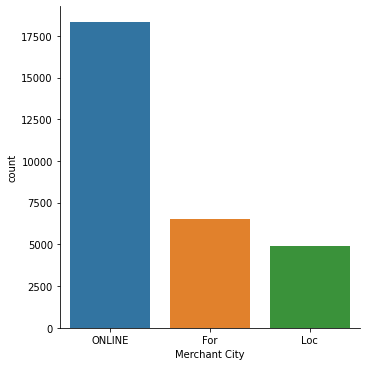

In [105]:
sns.catplot(x = 'Merchant City', data = frauds2, kind = 'count')
plt.show()

* __Amount of money:__ Considering the place/type of fraud, it is also interesting to know the amount of money of the commited frauds. As we can see in the boxplot below, there are plenty of outliers in the three types of fraud. Moreover, we can see that it is in online frauds where people "dare" to make transactions with the greatest amount of money. On the other hand, we can see that most of the frauds are committed for less than 500 dollars.

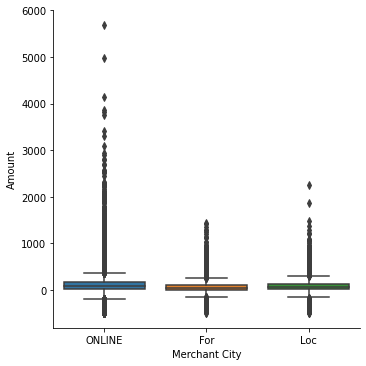

In [107]:
sns.catplot(x = 'Merchant City', y = 'Amount', data = frauds2, kind = 'box')
plt.show()

* __Type of error:__ It is likely that frauds ar associated with a particular type of error. In order to verify that information, we plot the different type of errors. We can see below that the most common associated errrors are "insufficient balance", "Bad CVV" and "Bad PIN".

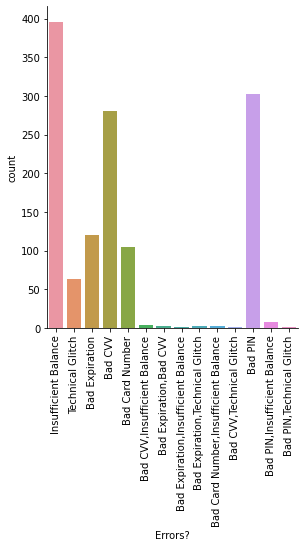

In [116]:
sns.catplot(x = 'Errors?', data = frauds2, kind = 'count')
plt.xticks(rotation = 90)
plt.show()

If we hue the previous plot by type of fraud (online, foreign or local) we can see that Bad PIN frauds are committed almost exclusively in local and foreign frauds:

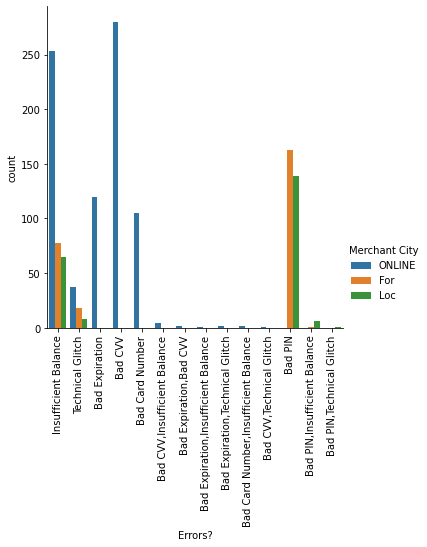

In [117]:
sns.catplot(x = 'Errors?', data = frauds2, hue = 'Merchant City', kind = 'count')
plt.xticks(rotation = 90)
plt.show()

* __Preferred month for frauds:__ It would also be interesting to see whether there is a particular month in which most of the frauds are committed. In the plot below we can see that there is only a light increase in fraud commitment near the end of the year.

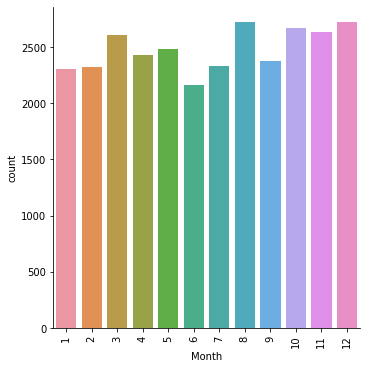

In [118]:
sns.catplot(x = 'Month', data = frauds2, kind = 'count')
plt.xticks(rotation = 90)
plt.show()

*  __Day__ It is likely that frauds are commited on a specifica day of the month.

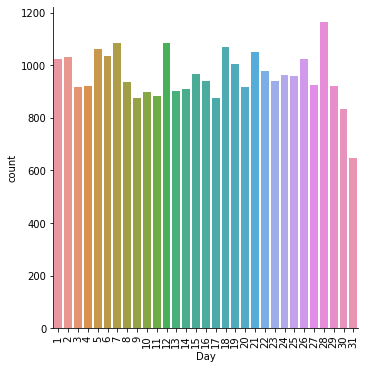

In [111]:
sns.catplot(x = 'Day', data = frauds2, kind = 'count')
plt.xticks(rotation = 90)
plt.show()

* __Hour:__ Let us see whether there is a special hour in which frauds are committed.

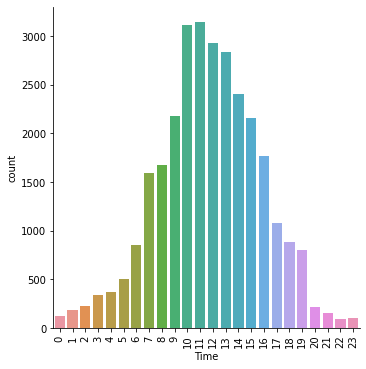

In [112]:
sns.catplot(x = 'Time', data = frauds2, kind = 'count')
plt.xticks(rotation = 90)
plt.show()

It seems that preferred hour for frauds commitment is around 12:00 pm. This could either one particular attribute of fraud commitment or one attribute of all credit card transactions.

* __Use of Chip:__ We must also see whether one specific use of the credit card was privileged over the others when a fraud was committed:

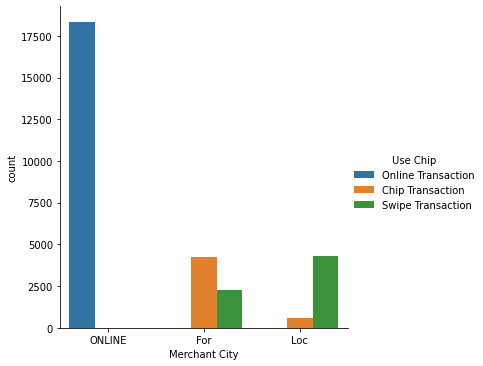

In [122]:
sns.catplot(x = 'Merchant City', data = frauds2, hue = 'Use Chip', kind = 'count')
plt.show()

## 5. Preprocessing<a id='Preprocessing'></a>

From the exploratory analysis we can see that our dataset is highly unbalanced. Thus, we will downsample the clean transactions. Still, it is important to consider in this case the proportion of local, foreign and online transactions.

There are 29757 frauds; hence the number of clean transactions must be the same but considering the following proportions:

* Foreign clean transactions.
* Online clean transactions.
* Local clean transactions.

In [31]:
np.random.seed(123)

# Sample of foreign no frauds   ---size = PFnofrauds * Nfrauds----
fornofrauds = nofrauds[np.logical_and(nofrauds['Zip'] == 'none', nofrauds['Merchant State'] != 'none')].reset_index(drop = True)
sfornf = fornofrauds.iloc[np.random.choice(fornofrauds.index, replace = False, size = (PFnofrauds*Nfrauds).astype('int32')),: ]

In [32]:
np.random.seed(123)

# Sample of local no frauds    ---size = PLnofrauds * Nfrauds ----
locnofrauds = nofrauds[np.logical_and(nofrauds['Zip'] != 'none', nofrauds['Merchant State'] != 'none')].reset_index(drop = True)
slocnf = locnofrauds.iloc[np.random.choice(locnofrauds.index, replace = False, size = (PLnofrauds * Nfrauds).astype('int32')),:]

In [35]:
np.random.seed(123)

# Sample of online no frauds  ---- size = POnofrauds * Nfrauds ---
onlnofrauds = nofrauds[np.logical_and(nofrauds['Zip'] == 'none', nofrauds['Merchant State'] == 'none')].reset_index(drop = True)

sonlnf = onlnofrauds.iloc[np.random.choice(onlnofrauds.index, replace = False, size = (POnofrauds*Nfrauds).astype('int32')+1)]

In [38]:
# Create a copy of dataset with only three merchant cities: foreign, local and online
sfornf2 = sfornf.copy()
sfornf['Merchant City'] = 'Foreign'
slocnf2 = slocnf.copy()
slocnf['Merchant City'] = 'Local'

In [40]:
np.random.seed(123)

# Concatenate the fraud dataset with no fraud datasets and create permutation of dataset.
sample = pd.concat([sfornf, slocnf, sonlnf, frauds2]).reset_index(drop = True)
sample = sample.iloc[np.random.permutation(range(len(sample))),:].reset_index(drop = True)
sample.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,615,5,2008,12,18,13,11.11,Swipe Transaction,8438446124682714015,Local,NJ,7731.0,5541,none,Yes
1,321,3,2010,4,14,7,1.61,Swipe Transaction,-6571010470072147219,Local,ND,58103.0,5499,none,No
2,1204,0,2018,3,12,13,32.61,Chip Transaction,6051395022895754231,Local,Italy,none,5310,none,Yes
3,260,3,2015,4,5,10,-92.00,Chip Transaction,-1288082279022882052,Local,NC,27320.0,5499,none,No
4,490,5,2004,7,25,7,48.03,Swipe Transaction,2027553650310142703,Local,FL,33060.0,5541,none,No


## 6. Modelling: Decision Tree<a id='ModellingDecisionTree'></a>

In [54]:
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from io import StringIO
from IPython.display import Image
import pydotplus
import graphviz

### 6.1  Feature Engineerging

With the sample we created above, we will get our feature set and our response set. In this case, __we will not standarize any variable__. The only numerical variable in this dataset is in the "Amount" column.

In [42]:
# Choose feature variables
# x = sample.drop('Is Fraud?', axis = 1, inplace = False)
x = sample[['Month','Day','Time','Amount','Merchant City','Errors?']]
x.head()

,Month,Day,Time,Amount,Merchant City,Errors?
0,12,18,13,11.11,Local,none
1,4,14,7,1.61,Local,none
2,3,12,13,32.61,Local,none
3,4,5,10,-92.00,Local,none
4,7,25,7,48.03,Local,none


In [43]:
# Choose labels
y = sample[['Is Fraud?']]
y.head()

,Is Fraud?
0,Yes
1,No
2,Yes
3,No
4,No


Once we have our features, it is important to generate dummy variables for our categorical values:

In [49]:
# Create dummy variables
xd = pd.get_dummies(x,drop_first = True)
xd.head()

,Month,Day,Time,Amount,Merchant City_Local,Merchant City_ONLINE,"Errors?_Bad CVV,Insufficient Balance","Errors?_Bad CVV,Technical Glitch",Errors?_Bad Card Number,"Errors?_Bad Card Number,Insufficient Balance",...,"Errors?_Bad Expiration,Insufficient Balance","Errors?_Bad Expiration,Technical Glitch",Errors?_Bad PIN,"Errors?_Bad PIN,Insufficient Balance","Errors?_Bad PIN,Technical Glitch",Errors?_Bad Zipcode,Errors?_Insufficient Balance,"Errors?_Insufficient Balance,Technical Glitch",Errors?_Technical Glitch,Errors?_none
0,12,18,13,11.11,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4,14,7,1.61,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,12,13,32.61,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,5,10,-92.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,7,25,7,48.03,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


We will now create our train set and our test set of variables.

In [50]:
# Create train and test sets with 30% test
x_train, x_test, y_train, y_test = train_test_split(xd, y, test_size = 0.3, random_state = 123)

### 6.2  Entropy model - no max_depth

In [51]:
# Instantiate model
entmod = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 123)

# Fit model
entmod.fit(x_train, y_train)

# Prediction
y_pred = entmod.predict(x_test)

# Transform predition to pd.Series
y_pred = pd.Series(y_pred)

In [52]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

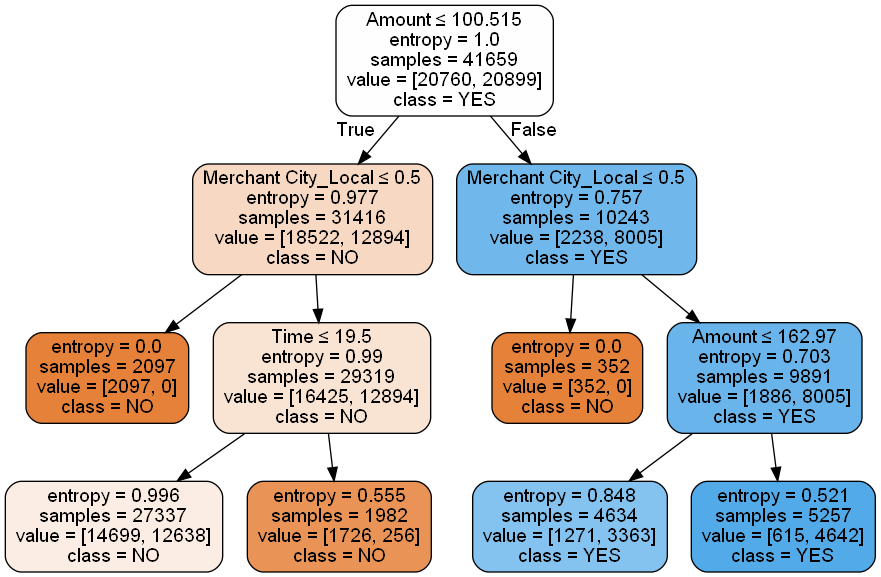

In [53]:
# Visualization
dot_data = StringIO()

# Graphviz export
tree.export_graphviz(entmod, out_file = dot_data, filled = True, rounded = True, special_characters = True, 
                    feature_names = x_train.columns, class_names = ['NO','YES']) 

# PNG image
pl = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(pl.create_png())

### 6.3 Metrics

In [55]:
print(confusion_matrix(y_test,y_pred))

[[8187  810]
 [5443 3415]]


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.60      0.91      0.72      8997
         Yes       0.81      0.39      0.52      8858

    accuracy                           0.65     17855
   macro avg       0.70      0.65      0.62     17855
weighted avg       0.70      0.65      0.62     17855



## 7. Modelling: Logistic Regression Model

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### 7.1 Feature Engineering

In [99]:
# Choose feature variables
# x2 = sample.drop('Is Fraud?', axis = 1, inplace = False)
x2 = sample[['Month','Day','Time','Amount','Merchant City','Errors?', 'Use Chip','Card']]
x2.head()

,Month,Day,Time,Amount,Merchant City,Errors?,Use Chip,Card
0,12,18,13,11.11,Local,none,Swipe Transaction,5
1,4,14,7,1.61,Local,none,Swipe Transaction,3
2,3,12,13,32.61,Local,none,Chip Transaction,0
3,4,5,10,-92.00,Local,none,Chip Transaction,3
4,7,25,7,48.03,Local,none,Swipe Transaction,5


In [59]:
# Choose labels
y = sample[['Is Fraud?']]
y.head()

,Is Fraud?
0,Yes
1,No
2,Yes
3,No
4,No


In [67]:
y = np.array(y).reshape(-1)

In [100]:
# Create dummy variables
xd2 = pd.get_dummies(x2,drop_first = True)
xd2.head()

,Month,Day,Time,Amount,Card,Merchant City_Local,Merchant City_ONLINE,"Errors?_Bad CVV,Insufficient Balance","Errors?_Bad CVV,Technical Glitch",Errors?_Bad Card Number,...,Errors?_Bad PIN,"Errors?_Bad PIN,Insufficient Balance","Errors?_Bad PIN,Technical Glitch",Errors?_Bad Zipcode,Errors?_Insufficient Balance,"Errors?_Insufficient Balance,Technical Glitch",Errors?_Technical Glitch,Errors?_none,Use Chip_Online Transaction,Use Chip_Swipe Transaction
0,12,18,13,11.11,5,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,4,14,7,1.61,3,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,3,12,13,32.61,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,5,10,-92.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,7,25,7,48.03,5,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [101]:
# Create train and test sets with 30% test
x2_train, x2_test, y_train, y_test = train_test_split(xd2, y, test_size = 0.3, random_state = 123)

### 7.2 Logistic Regression Model

In [104]:
# Define hyperparameter space (c_space)
c_space = np.logspace(-5,8,15)
# Define grid
grid = {'C':c_space}
# Instatiate LogReg classifier
lr = LogisticRegression(solver = 'lbfgs', max_iter = 1600)
# GridSearch
lrcv = GridSearchCV(lr, grid, cv = 5)

In [105]:
lrcv.fit(xd2,y)
lrcv.best_params_

{'C': 11787686.347935867}

In [106]:
lrcv.best_score_

0.826931562816348

In [107]:
# Fitting model
lr = LogisticRegression(C = 11787686.347935867, solver = 'lbfgs', max_iter = 600)
lr.fit(x2_train, y_train)

LogisticRegression(C=11787686.347935867, max_iter=600)

In [108]:
y2_pred = lr.predict(x2_test)

### 7.3 Metrics

In [109]:
print(confusion_matrix(y_test,y2_pred))

[[8761  236]
 [2882 5976]]


In [110]:
print(classification_report(y_test, y2_pred))

              precision    recall  f1-score   support

          No       0.75      0.97      0.85      8997
         Yes       0.96      0.67      0.79      8858

    accuracy                           0.83     17855
   macro avg       0.86      0.82      0.82     17855
weighted avg       0.86      0.83      0.82     17855

